In [1]:
# numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn -- for better looking plots
import seaborn as sns

# scipy for hierarchichal clustering
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

# pandas 
import pandas as pd

# rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import Descriptors
from rdkit import DataStructs
from rdkit.Chem import rdMolDescriptors

# pubchem API
import pubchempy as pubchem


/Users/curt/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
MOLECULE_NAMES = ['4-Hydroxybenzaldehyde', 
                  '4-Hydroxybenzoic acid', 
                  'Ferulic acid',
                  'p-Coumaric acid',
                  'Vanillin', 
                  'Vanillic acid', 
                  'Syringaldehyde',
                  'Syringic acid',
                  'Benzylamine', 
                  'Nicotinic acid',
                  'L-Phenylalanine', 
                  'L-Pyroglutamic acid'
                  ]

In [3]:
def get_SMILES_from_name(name):
    """Gets a SMILES string representing a molecule from a name.  
    If PubChem contains multiple matches to a name, only the first is retained."""
    return pubchem.get_properties('IsomericSMILES', name, namespace='name')[0]['IsomericSMILES']

In [5]:
molecule_smiles = [get_SMILES_from_name(mol_name) for mol_name in MOLECULE_NAMES]
molecules = [Chem.MolFromSmiles(smiles) for smiles in molecule_smiles]
molecule_fingerprints = [FingerprintMols.FingerprintMol(mol) for mol in molecules]

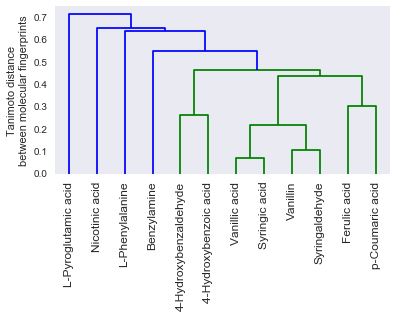

In [7]:
def compute_tanimoto_mat(fingerprint_list_1, fingerprint_list_2):
    length1, length2 = len(fingerprint_list_1), len(fingerprint_list_2)
    out_matrix = np.zeros(shape=(length1, length2), dtype=float)
    for idx1, fp1 in enumerate(fingerprint_list_1):
        for idx2, fp2 in enumerate(fingerprint_list_2):
            out_matrix[idx1, idx2] = DataStructs.FingerprintSimilarity(fp1, fp2)
    return out_matrix

dist_mat = 1 - compute_tanimoto_mat(molecule_fingerprints, molecule_fingerprints)
dist_mat = squareform(dist_mat)

linkage_mat = hierarchy.linkage(dist_mat, method='average')

plt.figure(figsize=(6, 3))
hierarchy.dendrogram(linkage_mat, labels=MOLECULE_NAMES, leaf_rotation=90)
plt.grid('off')
plt.ylabel('Tanimoto distance\nbetween molecular fingerprints')